# Amazon Sales Data Q2 2022


## About the dataset
This data contains E- commerce sales of Amazon India for the quarter 2 of 2022.It has the columns such as SKU codes, design numbers, stock levels, product categories, sizes and shipped state.The time period of data is from 31st March to 29th June, in particular 90 days of data.

##### Attributes:

   - Order ID: Order Identification Number. (String)
   - Date: Date of the sale. (Date)
   - Status: Status of the sale. (String)
   - Fulfilment: Method of fulfilment. (String)
   - Sales Channel: Method of selling. (String)
   - Ship Service Level: Method of Shipping Service. (String)
   - Style: Style of the product. (String)
   - SKU: Stock Keeping Unit. (String)
   - Category: Type of product. (String)
   - Size: Size of the product. (String)
   - ASIN: Amazon Standard Identification Number. (String)
   - Courier Status: Status of the courier. (String)
   - Qty: Quantity of the product. (Integer)
   - Currency: The currency used for the sale (INR). (String)
   - Amount: Amount of the sale.(in INR) (Float)
   - Ship City: Destination City of the shipment. (String)
   - Ship State: Destination State of the shipment. (String)
   - Ship Postal Code: Destination Postal Code of the shipment. (String)
   - Ship Country: Destination Country of the shipment. (String)
   - Promotion IDS: Promotion code of the sale. (String)
   - B2B: Business to business sale. (Boolean)


## Questions for Analysis:

This Project aims to answer the following Questions:

1. When are sales are high and why?
2. Which categories registered higher sales?
3. Is there any category that shows consistent growth?
4. What are the 10 states that generate most income?
5. Which category has higher returns or cancellation?


## Assessing Data

In [75]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
# Load and check few rows of data
df = pd.read_csv('Amazon Sale Report.csv',index_col='index',parse_dates=True,low_memory=False)
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [77]:
# Checking shape of data
df.shape

(128975, 23)

In [78]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [79]:
# Statistics of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


In [80]:
# No. of unique values in each column
df.nunique().to_frame(name='Count of unique values').T

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
Count of unique values,120378,91,13,2,2,2,1377,7195,9,11,...,1,1410,8955,69,9459,1,5787,2,1,1


In [81]:
# Unique values in each column
df.apply(pd.unique).to_frame()

,0
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."
Size,"[S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]"


## Exploratory Data Analysis

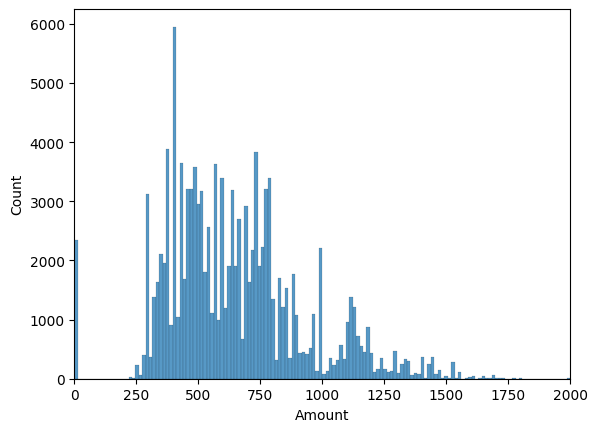

In [82]:
# Sales value distribution shown through histogram
sns.histplot(data = df,x='Amount')
plt.xlim(0,2000);

#### Observation:
This clearly shows our sale value data is right skewed. 75% of our sale value are within INR 788.

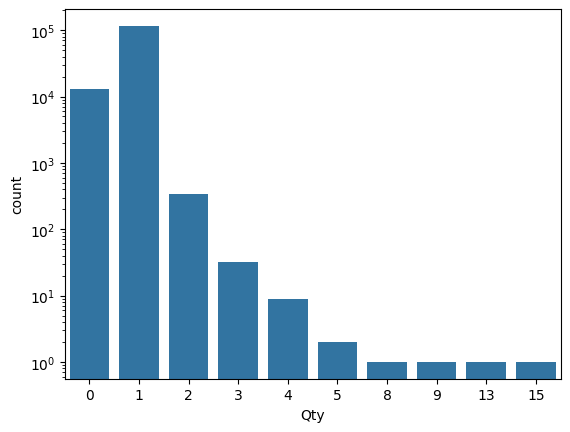

In [83]:
sns.countplot(data=df,x='Qty',color='tab:blue')
plt.yscale('log')

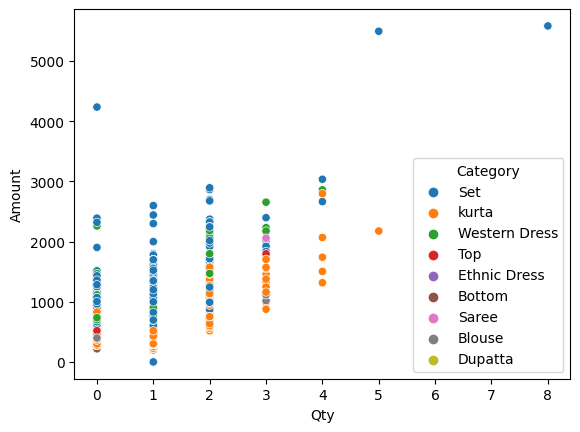

In [84]:
sns.scatterplot(data=df,x='Qty',y='Amount',hue='Category');

<AxesSubplot:ylabel='Category'>

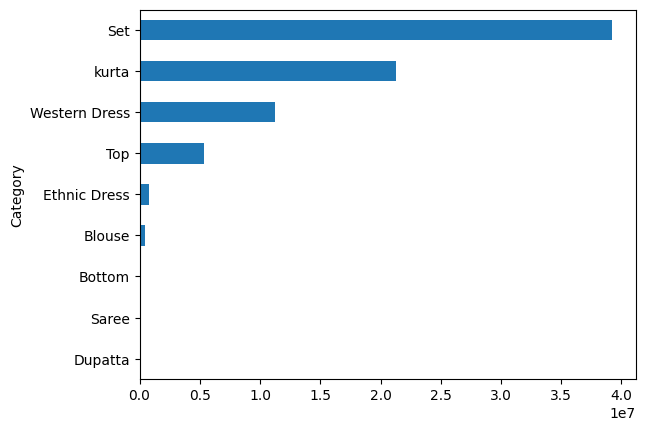

In [85]:
df.groupby('Category')['Amount'].sum().sort_values().plot(kind='barh')
# Category set has registered higher sales

Most of our sales are coming from Set,Kurta and Western dress

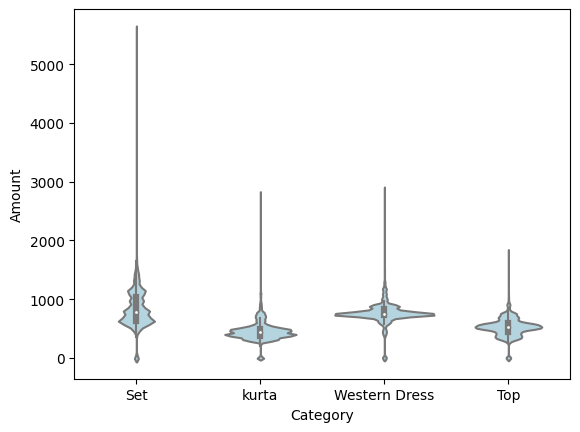

In [86]:
topcat = df[df['Category'].isin(['Set','kurta','Western Dress','Top'])]
sns.violinplot(data=topcat,x='Category',y='Amount',color='lightblue');

<AxesSubplot:xlabel='Size'>

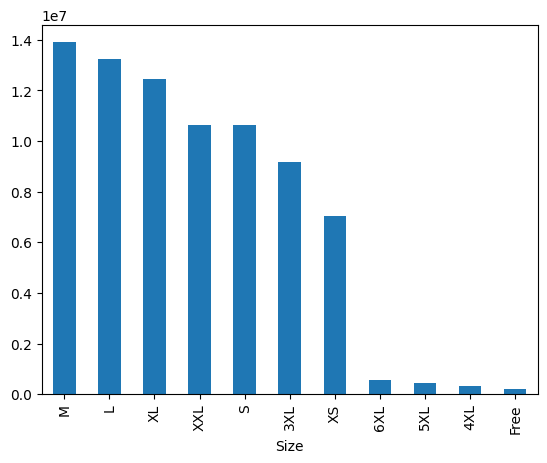

In [87]:
# Sales of different sizes
df.groupby('Size')['Amount'].sum().sort_values(ascending=False).plot(kind='bar')

We have datapoints in all the different sizes, Most common sizes are Medium,Large and Xtra Large.

<AxesSubplot:ylabel='Status'>

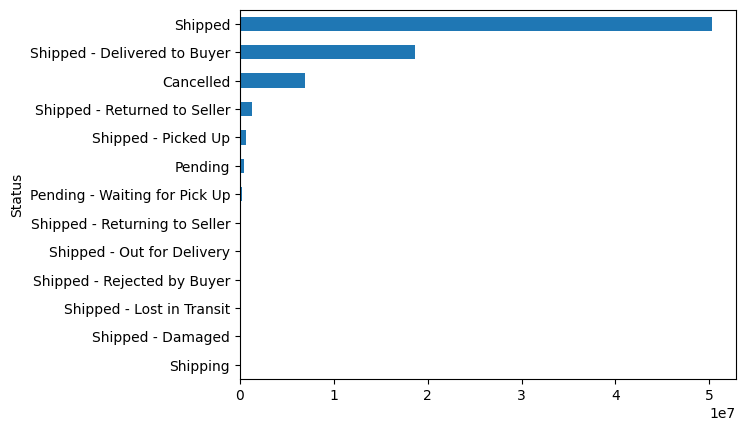

In [88]:
df.groupby('Status')['Amount'].sum().sort_values().plot(kind='barh')

<AxesSubplot:>

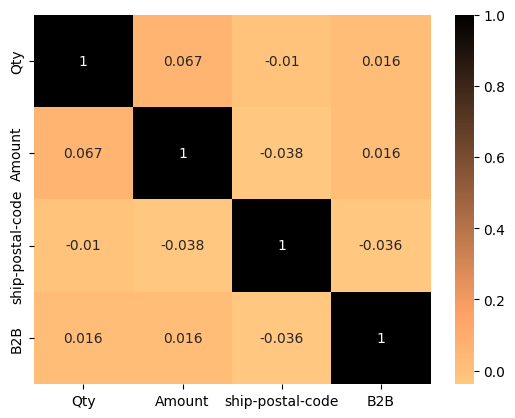

In [89]:
sns.heatmap(df.corr(),annot=True,cmap='copper_r')

## Cleaning Data

In [90]:
# Dropping columns
df.drop(columns=['fulfilled-by','Unnamed: 22','currency','ship-country','Sales Channel '],inplace=True)

In [91]:
# Checking for duplicates
df.duplicated().sum()

6

In [92]:
# Removing duplicated rows
df.drop_duplicates(inplace=True,ignore_index=True)

In [93]:
# Checking for duplicates
df.duplicated().sum()

0

In [94]:
# Checking for nan values
df.isna().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
Amount                 7792
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49150
B2B                       0
dtype: int64

In [95]:
# Filling nan values
df.loc[df['promotion-ids'].isnull(),'promotion-ids']= 'NoPromotion'
df['Courier Status'].fillna('Unknown',inplace=True)

In [96]:
# Status values for the fields with nan in Amount column
df[df['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x,'.2%'))

Cancelled                       97.06%
Shipped                          2.67%
Shipped - Delivered to Buyer     0.10%
Shipping                         0.10%
Shipped - Returned to Seller     0.04%
Pending                          0.03%
Name: Status, dtype: object

In [97]:
# Filling nan values
df['Amount'].fillna(0,inplace=True)

In [98]:
# Dropping nan value rows
df.dropna(inplace=True)

In [99]:
# Checking for null values
df.isnull().sum().sum()

0

In [100]:
# Changing datatype of Date
df['Date'] = pd.to_datetime(df['Date'])

In [101]:
# Changing datatype
df['ship-postal-code']= df['ship-postal-code'].astype('str').apply(lambda x : x.split('.')[0])

In [102]:
# Checking period of data
df['Date'].min(),df['Date'].max()

(Timestamp('2022-03-31 00:00:00'), Timestamp('2022-06-29 00:00:00'))

In [103]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

- It contains Q2 2022 data. But need to exclude march 31st data.
- There is no repetition of values in Category due to misspelling or case difference

In [104]:
# Checking State variable
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi',
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

- State Column has mix of upper and lower case data, misspelled names and Abbreviated names.

In [105]:
# Converting to uppercase
df['ship-state'] = df['ship-state'].apply(lambda x:x.upper())

In [106]:
# Checking values to identify misspelled names and Abbreviated names
df[df['ship-state'] == ('NL')]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
3413,171-2247193-1690717,2022-04-28,Shipped,Amazon,Expedited,JNE3640,JNE3640-TP-N-M,Top,M,B08ZHM3373,Shipped,1,518.0,DIMAPUR,NL,797116,IN Core Free Shipping 2015/04/08 23-48-5-108,False
94839,171-4171855-7000362,2022-06-26,Shipped,Amazon,Expedited,JNE3654,JNE3654-TP-M,Top,M,B09B3HRDLP,Shipped,1,443.0,DIMAPUR,NL,797116,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [107]:
# Correcting values in state variable
df['ship-state'].replace(['RAJSHTHAN','RAJSTHAN','RJ'],'RAJASTHAN',inplace=True)
df['ship-state'].replace('NEW DELHI','DELHI',inplace=True)
df['ship-state'].replace(['PUNJAB/MOHALI/ZIRAKPUR','PB'],'PUNJAB',inplace=True)
df['ship-state'].replace('AR','ARUNACHAL PRADESH',inplace=True)
df['ship-state'].replace('NL','NAGALAND',inplace=True)
df['ship-state'].replace('PONDICHERRY','PUDUCHERRY',inplace=True)

In [108]:
# Adding new columns weekday and month
df['Weekday'] = df['Date'].dt.weekday
month = {3:'March',4:'April',5:'May',6:'June'}
df['Month'] = df['Date'].dt.month.map(month)

In [109]:
# Creating new column indicating sales happened with promotion or not
df['Promotion']= df['promotion-ids'].map({'NoPromotion':'NoPromotion',
                                              'IN Core Free Shipping 2015/04/08 23-48-5-108':'WithPromotion'})
df['Promotion'].fillna('WithPromotion',inplace=True)
df['Promotion'].value_counts()

WithPromotion    79794
NoPromotion      49142
Name: Promotion, dtype: int64

In [110]:
# Adding new variable sale_type to identify sales and returns using status column
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [111]:
# Creating new column Sale_type
df['Sale_type']= df['Status'].map({'Cancelled':'Returns','Shipped - Returned to Seller':'Returns',
                                   'Shipped - Rejected by Buyer':'Returns','Shipped - Lost in Transit':'Returns','Shipped - Returning to Seller':'Returns',
                                   'Shipped - Damaged':'Returns','Shipped - Delivered to Buyer':'Sales','Shipped':'Sales',
                                   'Shipped - Out for Delivery':'Sales','Shipped - Picked Up':'Sales',
                                   'Pending':'Sales','Pending - Waiting for Pick Up':'Sales','Shipping':'Sales'})

In [112]:
# Checking are they mapped right
df.groupby(['Sale_type','Status'])['Qty'].count()

Sale_type  Status                       
Returns    Cancelled                        18322
           Shipped - Damaged                    1
           Shipped - Lost in Transit            5
           Shipped - Rejected by Buyer         11
           Shipped - Returned to Seller      1950
           Shipped - Returning to Seller      145
Sales      Pending                            658
           Pending - Waiting for Pick Up      281
           Shipped                          77785
           Shipped - Delivered to Buyer     28762
           Shipped - Out for Delivery          35
           Shipped - Picked Up                973
           Shipping                             8
Name: Qty, dtype: int64

- Converting Amount from INR to \$

INR/USD Rate on 2022-3-31, 1 INR = 0.01317 USD

In [113]:
df['AmountUSD'] = df['Amount'].apply(lambda x: format(x*0.01317,'.2f')).astype('float')

In [114]:
# Saving cleaned dataset
df.to_csv('Ecommerce_sales_cleaned.csv')

## Data Analysis

In [115]:
# Making subset without march data
q2df = df[df['Month']!= 'March'].reset_index()

In [116]:
q2df.shape

(128765, 24)

In [117]:
# Converting month column to Categorical datatype with desired order
order = ['April','May','June']
q2df['Month'] = pd.Categorical(q2df['Month'],categories=order,ordered=True)

In [118]:
# Monthly sales for Q2 '22
q2df.groupby('Month')['AmountUSD','Qty'].sum()

/tmp/ipykernel_190354/2425692777.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  q2df.groupby('Month')['AmountUSD','Qty'].sum()


,AmountUSD,Qty
Month,,
April,379686.67,44196
May,345281.89,37998
June,308429.35,34268


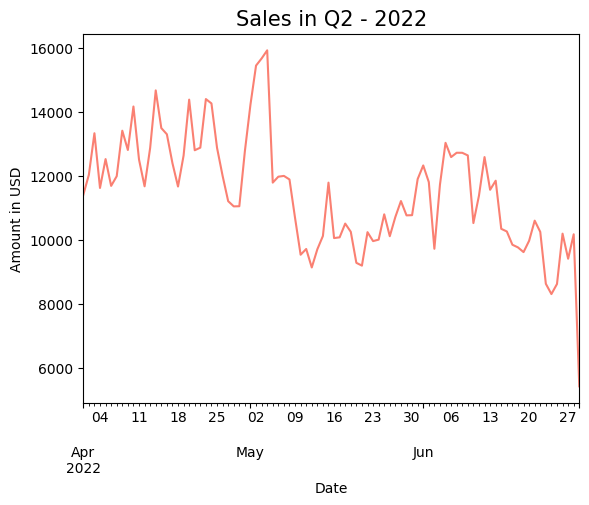

In [119]:
# Everyday sales of Q2
q2df.groupby(['Date'])['AmountUSD'].sum().plot(kind='line',color='salmon')
plt.title("Sales in Q2 - 2022",fontsize=15)
plt.ylabel('Amount in USD');

In [120]:
q2df[q2df['Month']== 'May'].groupby('Date')['AmountUSD'].sum()[:10].to_frame()
# Sales is high from May 1st to May 4th

,AmountUSD
Date,
2022-05-01,14222.02
2022-05-02,15438.18
2022-05-03,15660.75
2022-05-04,15915.11
2022-05-05,11782.74
2022-05-06,11968.06
2022-05-07,11992.40
2022-05-08,11881.44
2022-05-09,10679.53


In [121]:
# Lets check first five days sale of May month for categories
maydf = q2df[q2df['Date'].isin(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04','2022-05-05'])]
maydf1 = maydf.groupby(['Category','Date'])['AmountUSD'].sum().reset_index()
maypivot = maydf1.pivot(index='Category',columns='Date',values='AmountUSD')
maypivot

Date,2022-05-01,2022-05-02,2022-05-03,2022-05-04,2022-05-05
Category,,,,,
Blouse,90.61,91.66,77.15,27.41,46.62
Bottom,19.91,52.41,7.10,17.89,4.17
Ethnic Dress,39.70,114.98,190.91,102.01,107.69
Saree,7.41,10.79,26.73,56.71,49.13
Set,7540.12,7907.20,7969.89,8828.87,6167.21
Top,880.95,889.73,827.40,962.65,769.32
Western Dress,1544.39,1580.00,1782.54,1781.27,1410.09
kurta,4098.93,4791.41,4779.03,4138.30,3228.51


In [122]:
# Lets check first five days sale of May month for Promotion
maydfpro = maydf.groupby(['Category','Promotion'])['AmountUSD'].sum().reset_index()
maypivotpro = maydfpro.pivot(index='Category',columns='Promotion',values='AmountUSD')
maypivotpro

Promotion,NoPromotion,WithPromotion
Category,,
Blouse,82.62,250.83
Bottom,37.93,63.55
Ethnic Dress,271.28,284.01
Saree,31.75,119.02
Set,10688.39,27724.90
Top,1620.31,2709.74
Western Dress,1640.74,6457.55
kurta,9165.03,11871.15


- Promotion helped to book higher sales in these days.
- By googling Amazon summer sale 2022 happened on May 4th

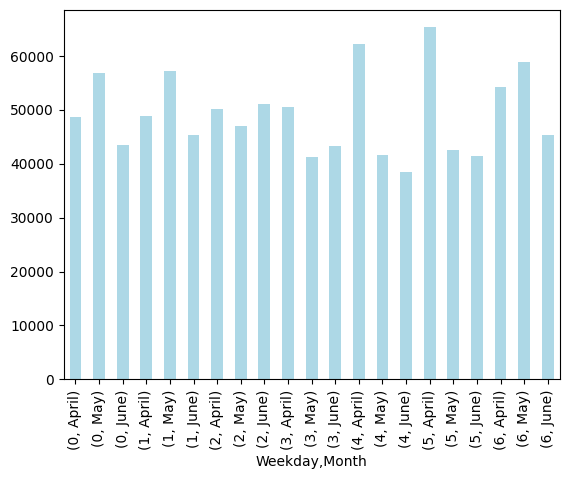

In [123]:
q2df.groupby(['Weekday','Month'])['AmountUSD'].sum().plot(kind='bar',color='lightblue');

It shows there is no particular trend of sales in weekdays or weekends.Throughout Q2 sales differ for different days. 

In [124]:
facet = q2df.groupby(['Month','Weekday','Promotion'])['AmountUSD'].sum().reset_index()

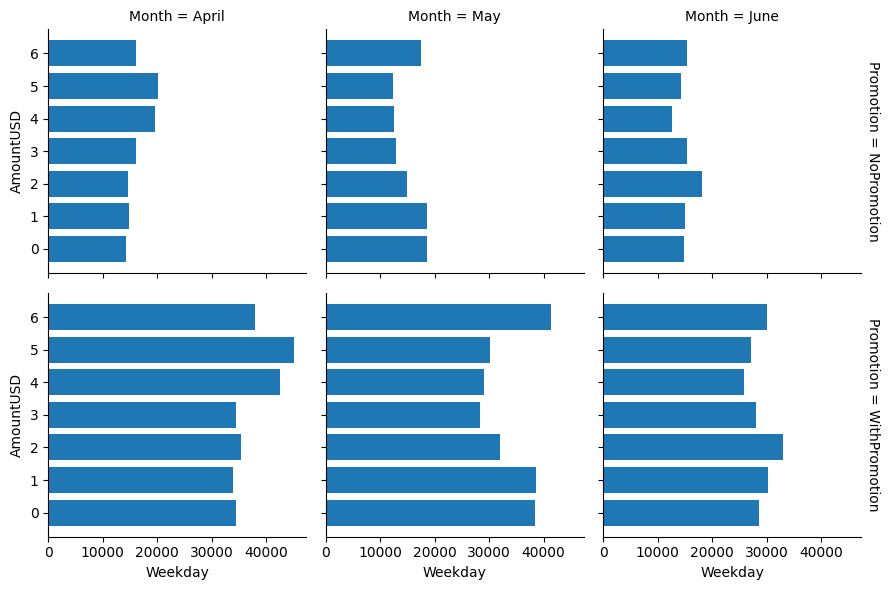

In [125]:
g = sns.FacetGrid(data=facet,col='Month',row='Promotion',margin_titles=True)
g.map(plt.barh,'Weekday','AmountUSD');

Products with promotion sells faster, most of the sales comes from promotion. Promotion is the key driver for online sales irrespective of which day it runs.Our data mostly on Apparel, festivals or any other auspicious day coming ahead might also be the driver of sales.Sale peaked in first week of May due to great summer sale event by Amazon

In [126]:
catdf = q2df.groupby(['Category','Month'])['AmountUSD'].sum().reset_index()
catpivot = catdf.pivot(index='Category',columns='Month',values='AmountUSD').sort_values(by='April',ascending=False)
catpivot.shape

(9, 3)

In [127]:
# Function for adding columns to find contribution of sales in a month by each category
def calper(v):
    a=[]
    for i in range(0,9):
        a.append(catpivot.iloc[i,v]/catpivot.iloc[:,v].sum()*100)
    return(a)    

catpivot['April%']= calper(0)
catpivot['May%']= calper(1)
catpivot['June%']= calper(2)

In [128]:
catpivot[:4]

Month,April,May,June,April%,May%,June%
Category,,,,,,
Set,204171.15,166467.16,144817.80,53.773589,48.211958,46.953314
kurta,105523.77,87653.42,86730.68,27.792329,25.386046,28.120112
Western Dress,38562.70,57703.84,51345.27,10.156453,16.712096,16.647336
Top,23985.07,26275.92,20093.16,6.317069,7.609991,6.514672


In [129]:
qtydf = q2df.groupby(['Category','Month'])['Qty'].sum().reset_index()
qtypivot = qtydf.pivot(index='Category',columns='Month',values='Qty').sort_values(by='April',ascending=False)

qtypivot['April%']= calper(0)
qtypivot['May%']= calper(1)
qtypivot['June%']= calper(2)
qtypivot

Month,April,May,June,April%,May%,June%
Category,,,,,,
Set,18139,14401,12668,53.773589,48.211958,46.953314
kurta,17671,13543,13745,27.792329,25.386046,28.120112
Western Dress,3778,5408,4750,10.156453,16.712096,16.647336
Top,3660,3763,2469,6.317069,7.609991,6.514672
Blouse,400,293,169,0.869551,1.117953,1.051956
Ethnic Dress,313,411,328,0.678396,0.609551,0.438742
Bottom,167,126,105,0.219568,0.193960,0.155750
Saree,68,53,31,0.193043,0.158444,0.114208
Dupatta,0,0,3,0.000000,0.000000,0.003910


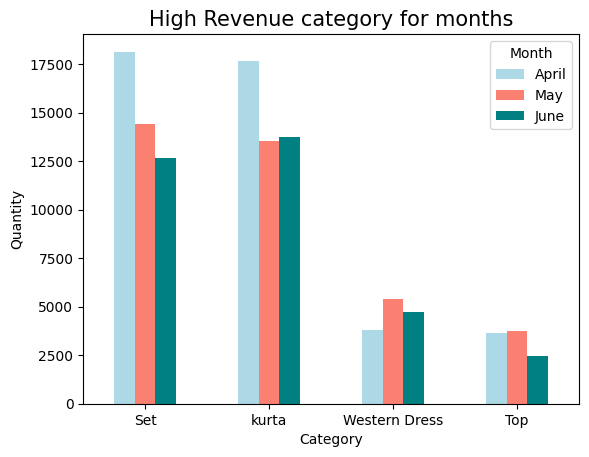

In [130]:
qtypivot.iloc[:4,:3].plot(kind='bar',color=['lightblue','salmon','teal'])
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.title("High Revenue category for months",fontsize=15);

More than 50% of sales coming from Set.But its sales is declining over the period. 

Western dress shows growth in sales in the month of May, where rest all other category are declining.

Even though sale of top is less than 10% it shows little growth.

Western dress , kurta and top are gaining the sales share from the set category.

In terms of Volume set and kurta has almost same quantity, but in value set has higher sale value.

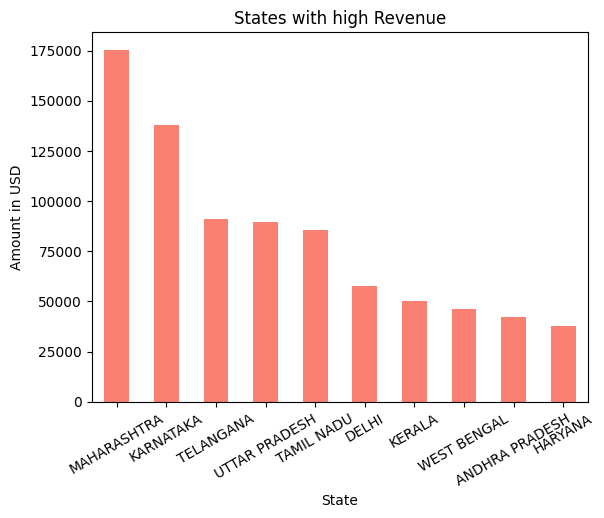

In [131]:
q2df.groupby(['ship-state'])['AmountUSD'].sum().sort_values(ascending=False)[:10].plot(kind='bar',color='salmon')
plt.xticks(rotation=30)
plt.xlabel('State')
plt.ylabel('Amount in USD')
plt.title('States with high Revenue');

### Returns Analysis

In [132]:
# Function for calculating return percentage
def returnper(x,a,b):
    retdf = x.groupby([a,b])['AmountUSD'].sum().reset_index()
    retpivot = retdf.pivot(index=b,columns=a,values='AmountUSD')
    retpivot['Ret%'] = (retpivot['Returns']/(retpivot['Returns']+retpivot['Sales']))*100
    return(retpivot)

In [133]:
# Calculating Monthly return percentage
returnper(q2df,'Sale_type','Month')

Sale_type,Returns,Sales,Ret%
Month,,,
April,41710.16,337976.51,10.985416
May,36273.29,309008.60,10.505413
June,31268.01,277161.34,10.137819


- Q2 returns remains almost same for all the months.

In [134]:
# Calculating Category wise return percentage
returnper(q2df,'Sale_type','Category').sort_values(by='Ret%')

Sale_type,Returns,Sales,Ret%
Category,,,
Saree,134.84,1497.45,8.260787
Ethnic Dress,909.60,9496.60,8.740943
Top,6744.12,63610.03,9.585959
Blouse,615.70,5417.96,10.204420
kurta,29176.72,250731.15,10.423687
Set,54896.11,460560.00,10.650007
Western Dress,16547.92,131063.89,11.210431
Bottom,226.45,1757.31,11.415191
Dupatta,NaN,12.06,NaN


- Returns in Bottom is high with 11.41%, But its overall sales is less compared to other category
- Western dress returns stands with 11.21%, we can further check them with sizes.
- Rest all are less than average percentage of 10.53% except Set

In [135]:
# Checking returns of Western dress
wddf = q2df[q2df['Category']=='Western Dress']
returnper(wddf,'Sale_type','Size').sort_values(by='Ret%')

Sale_type,Returns,Sales,Ret%
Size,,,
3XL,1741.10,16793.93,9.393565
XXL,2210.24,18487.00,10.678912
L,2851.87,23825.37,10.690274
XL,2476.63,20268.97,10.888392
M,2826.76,21873.27,11.444359
XS,1560.04,11605.49,11.849428
S,2881.28,18209.86,13.661092


- Size small of western dress has higher return value, It clearly shows there is problem in size 'S'. We can suggest the Sellers to give further more instruction on size 's' description of western dress.
- Traditional indian customers moving from set, kurta to western dress. People need to be educated on fittings of western dress, so further more elobaration on description of size details might reduce returns significantly.

In [136]:
# Checking daily returns
retdate = returnper(q2df,'Sale_type','Date')
retdate.sort_values(by='Ret%',ascending=False)[:10]

Sale_type,Returns,Sales,Ret%
Date,,,
2022-05-13,1432.67,8268.17,14.768515
2022-05-17,1435.82,8638.02,14.252956
2022-05-15,1618.58,10163.54,13.737596
2022-04-25,1765.10,11105.64,13.714052
2022-05-16,1359.39,8691.03,13.525703
2022-06-19,1295.31,8316.40,13.476374
2022-04-27,1500.73,9702.25,13.395811
2022-05-10,1247.09,8282.65,13.086296
2022-06-21,1375.13,9219.29,12.979757


In [137]:
# Average return percentage
retdate['Ret%'].mean()

10.53671211812841

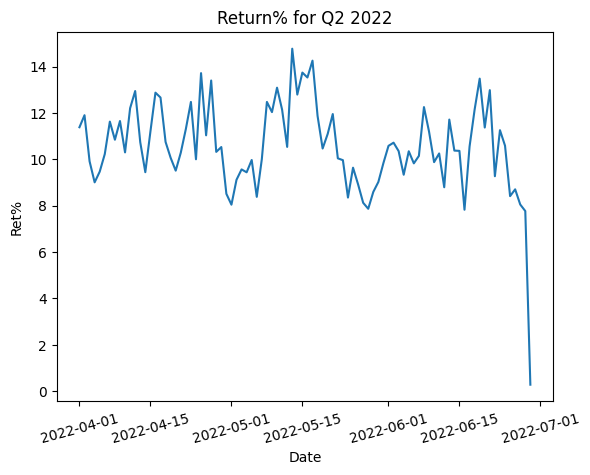

In [138]:
# Time series plot for return%
sns.lineplot(data=retdate,x='Date',y='Ret%')
plt.title('Return% for Q2 2022')
plt.xticks(rotation=15);

Average Returns are 10.5% with minimum and maximum of 8%, 14.8% respectively.
Returns are high on second week of May month with 14.8%, week after peak sales or summer sale promotion.

In [139]:
# Making subset of top 4 categories
q3df = q2df[q2df['Category'].isin(['Set','kurta','Western Dress','Top'])]
retmonth = q3df.groupby(['Sale_type','Month','Category'])['AmountUSD','Qty'].sum().reset_index()
retmonth[:10]

/tmp/ipykernel_190354/311803600.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  retmonth = q3df.groupby(['Sale_type','Month','Category'])['AmountUSD','Qty'].sum().reset_index()


,Sale_type,Month,Category,AmountUSD,Qty
0,Returns,April,Set,22349.58,1276
1,Returns,April,Top,2210.72,237
2,Returns,April,Western Dress,3983.05,225
3,Returns,April,kurta,12356.09,1226
4,Returns,May,Set,17678.48,962
5,Returns,May,Top,2565.94,256
6,Returns,May,Western Dress,6783.20,347
7,Returns,May,kurta,8497.20,864
8,Returns,June,Set,14868.05,862
9,Returns,June,Top,1967.46,180


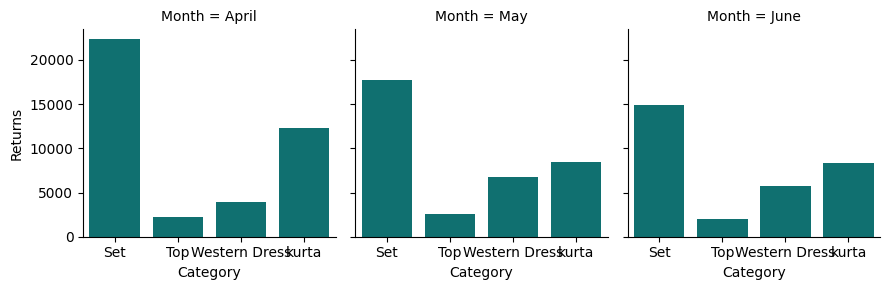

In [140]:
# Creating Facetgrid plot for returns
retpivot = retmonth.pivot(index=['Month','Category'],columns='Sale_type',values='AmountUSD').reset_index()
retpivot['Ret%'] = (retpivot['Returns']/(retpivot['Returns']+retpivot['Sales']))*100
retpivot
def barp(x,y,**kwargs):
    hueorder=['Sales','Returns']
    sns.barplot(x=x,y=y,color='teal')
    
g = sns.FacetGrid(data=retpivot,col='Month')    
g.map(barp,'Category','Returns');


## Explanatory Data Analysis

## Conclusion

### Q1 : When are sales are high and why?

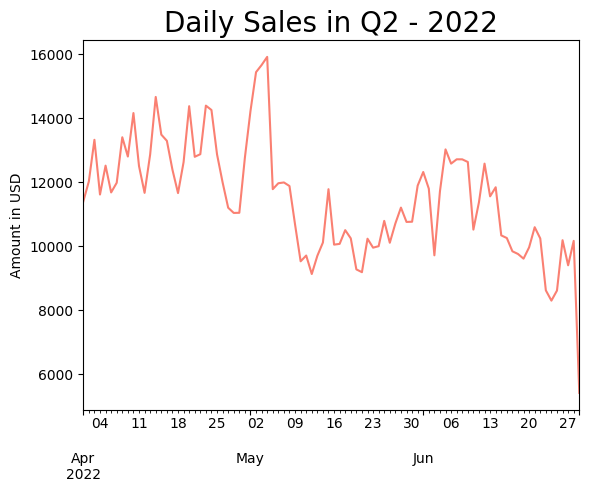

In [141]:
q2df.groupby(['Date'])['AmountUSD'].sum().plot(kind='line',color='salmon')
plt.title("Daily Sales in Q2 - 2022",fontsize=20)
plt.xlabel(None)
plt.ylabel('Amount in USD');

    April month has registered higher sales in Q2.Sale for this month is USD 379686 which is 37% of Q2. Even though April sales is higher, in daily sales May first week scores best due to great summer sale event by Amazon happened on May 4th 2022.Promotion helped to book higher sales in these days.

### Q2:  Which categories registered higher sales?

    There are nine categories in our dataset, namely Set, Kurta, WesternDress,Top,Ethnic Dress, Bottom, Saree, Blouse and Dupatta. More than 50% of sales coming from Set.But its sales is declining over the period. Western dress shows growth in sales in the month of May, whereas rest all other category are decreasing. Even though sale of top is less than 10% it shows growth. Western dress , kurta and top are gaining the sales share from the set category.

    In terms of Volume set and kurta has almost same quantity, but in value set has higher sales.

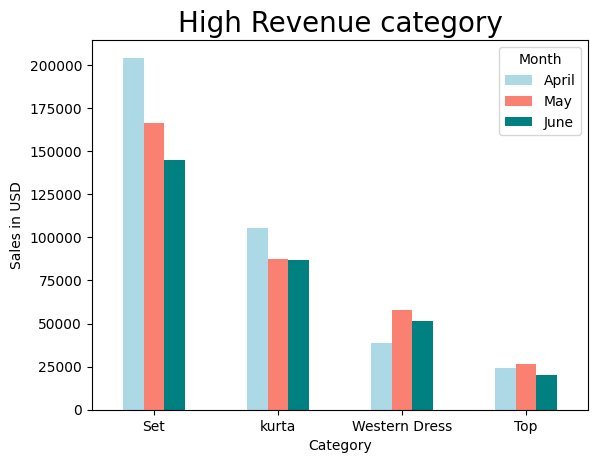

In [142]:
catpivot.iloc[:4,:3].plot(kind='bar',color=['lightblue','salmon','teal']);
plt.xticks(rotation=0);
plt.ylabel('Sales in USD');
plt.title("High Revenue category",fontsize=20,loc='center');

### Q3: Is there any category that shows consistent growth?

In [143]:
catpivot[:4]

Month,April,May,June,April%,May%,June%
Category,,,,,,
Set,204171.15,166467.16,144817.80,53.773589,48.211958,46.953314
kurta,105523.77,87653.42,86730.68,27.792329,25.386046,28.120112
Western Dress,38562.70,57703.84,51345.27,10.156453,16.712096,16.647336
Top,23985.07,26275.92,20093.16,6.317069,7.609991,6.514672


        Western Dress sales is improving over the period, increased by 6% in May, it shows little growth in June too. But in our dataset contains data till June 29th, if we add these two days sales this growth rate may be higher. So western dress category gaining share, can concentrate in this category to further improve sales.

### Q4: What are the 10 states that generate most revenue?

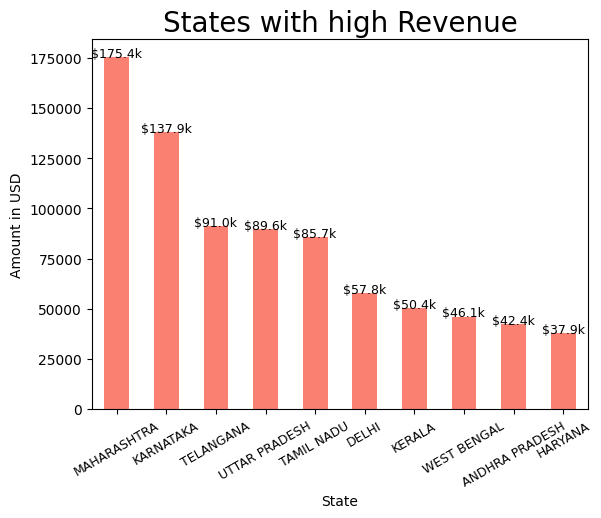

In [144]:
states = q2df.groupby(['ship-state'])['AmountUSD'].sum().sort_values(ascending=False)[:10]
states.plot(kind='bar',color='salmon')
plt.xticks(rotation=30,fontsize=9)
plt.xlabel('State')
plt.ylabel('Amount in USD')
for i,j in enumerate(states):
    plt.text(i, states.values[i] , f'${j/1000:.1f}k', ha='center', fontsize=9)

plt.title('States with high Revenue',fontsize=20);

### Q5: Which category has higher returns or cancellation?

    Quarter 2 returns remains almost the same for all the months with average of 10%.Category 'Bottom' returns are high with 11.41%, But its overall sales is less compared to other category.Increasing sales trend category 'Western dress' returns stands with 11.21%.Rest all others are less than average percentage of 10.53% except Set.

    Further investigation on western dress category reveals that Size small has higher return value, It clearly shows there is problem in size 'S'. 
    
    Traditional indian customers moving from set, kurta to western dress. People need to be educated on fittings of western dress, so further more elobaration on description of size details might reduce returns significantly.

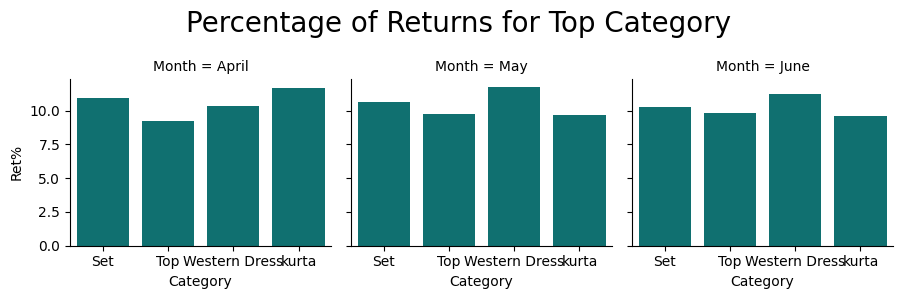

In [145]:
g = sns.FacetGrid(data=retpivot,col='Month')    
g.map(barp,'Category','Ret%')
g.fig.subplots_adjust(top=.75)
g.fig.suptitle('Percentage of Returns for Top Category',fontsize=20);